In [22]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

615

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval          ")
print("---------------------------------")

# Create counter.
record_count = 1
set_count = 1

Beginning Data Retrieval          
---------------------------------


In [8]:
# Loop through all the cities in our list.
for i in range(len(cities)):
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city/
    city_url = url + "&q=" + cities[i]

In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | rikitea
Processing Record 2 of Set 13 | omboue
Processing Record 3 of Set 13 | tofte
Processing Record 4 of Set 13 | nikolskoye
Processing Record 5 of Set 13 | kidal
Processing Record 6 of Set 13 | lompoc
Processing Record 7 of Set 13 | cap malheureux
Processing Record 8 of Set 13 | bluff
Processing Record 9 of Set 13 | la ronge
Processing Record 10 of Set 13 | ponta do sol
Processing Record 11 of Set 13 | souillac
Processing Record 12 of Set 13 | qaanaaq
Processing Record 13 of Set 13 | butaritari
Processing Record 14 of Set 13 | half moon bay
Processing Record 15 of Set 13 | ushuaia
Processing Record 16 of Set 13 | vaini
Processing Record 17 of Set 13 | pevek
Processing Record 18 of Set 13 | saldanha
Processing Record 19 of Set 13 | kavieng
Processing Record 20 of Set 13 | mingaora
Processing Record 21 of Set 13 | carnarvon
Processing Record 22 of Set 13 | punta arenas
Processing Record 23 of Set 13 | tucuman
Processing Record 24 of Set 13 | pangnirtun

Processing Record 36 of Set 16 | birnin kebbi
Processing Record 37 of Set 16 | baker city
Processing Record 38 of Set 16 | gbarnga
Processing Record 39 of Set 16 | sisimiut
Processing Record 40 of Set 16 | puerto del rosario
Processing Record 41 of Set 16 | caravelas
Processing Record 42 of Set 16 | manggar
Processing Record 43 of Set 16 | tasbuget
City not found. Skipping...
Processing Record 44 of Set 16 | kulu
Processing Record 45 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 46 of Set 16 | nadym
Processing Record 47 of Set 16 | cape town
Processing Record 48 of Set 16 | xai-xai
Processing Record 49 of Set 16 | poum
Processing Record 50 of Set 16 | majene
Processing Record 1 of Set 17 | bacuit
City not found. Skipping...
Processing Record 2 of Set 17 | mackenzie
Processing Record 3 of Set 17 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 17 | bani
Processing Record 5 of Set 17 | iralaya
Processing Record 6 of Set 17 | airai
Processing Reco

Processing Record 21 of Set 20 | fort-shevchenko
Processing Record 22 of Set 20 | kaspiyskiy
Processing Record 23 of Set 20 | sao filipe
Processing Record 24 of Set 20 | san cristobal
Processing Record 25 of Set 20 | amderma
City not found. Skipping...
Processing Record 26 of Set 20 | puerto penasco
Processing Record 27 of Set 20 | jalu
Processing Record 28 of Set 20 | praya
Processing Record 29 of Set 20 | mountain home
Processing Record 30 of Set 20 | san quintin
Processing Record 31 of Set 20 | ranong
Processing Record 32 of Set 20 | navalmoral de la mata
Processing Record 33 of Set 20 | turmalina
Processing Record 34 of Set 20 | royan
Processing Record 35 of Set 20 | trinidad
Processing Record 36 of Set 20 | kansanshi
Processing Record 37 of Set 20 | rybachiy
Processing Record 38 of Set 20 | tornio
Processing Record 39 of Set 20 | igarka
Processing Record 40 of Set 20 | ndende
Processing Record 41 of Set 20 | ahipara
Processing Record 42 of Set 20 | hun
Processing Record 43 of Set 

Processing Record 7 of Set 24 | kochubey
Processing Record 8 of Set 24 | ippy
Processing Record 9 of Set 24 | orbetello
Processing Record 10 of Set 24 | manoel urbano
Processing Record 11 of Set 24 | abu samrah
Processing Record 12 of Set 24 | thunder bay
Processing Record 13 of Set 24 | sorong
Processing Record 14 of Set 24 | cockburn town
Processing Record 15 of Set 24 | kasongo
Processing Record 16 of Set 24 | deoli
Processing Record 17 of Set 24 | santa cruz
Processing Record 18 of Set 24 | crab hill
City not found. Skipping...
Processing Record 19 of Set 24 | los llanos de aridane
Processing Record 20 of Set 24 | tigzirt
Processing Record 21 of Set 24 | kirakira
Processing Record 22 of Set 24 | asyut
Processing Record 23 of Set 24 | puerto escondido
Processing Record 24 of Set 24 | unai
Processing Record 25 of Set 24 | ust-nera
Processing Record 26 of Set 24 | vao
Processing Record 27 of Set 24 | labuhan
Processing Record 28 of Set 24 | belvedere marittimo
Processing Record 29 of 

In [10]:
len(city_data)

571

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,69.89,65,96,4.07,PF,2021-07-25 16:00:11
1,Omboue,-1.5746,9.2618,76.35,70,78,11.10,GA,2021-07-25 16:04:33
2,Tofte,59.5428,10.5614,87.12,46,82,7.05,NO,2021-07-25 16:04:33
3,Nikolskoye,59.7035,30.7861,71.78,46,68,5.68,RU,2021-07-25 16:04:34
4,Kidal,18.4411,1.4078,103.96,20,61,10.96,ML,2021-07-25 16:04:34


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-07-25 16:00:11,-23.1203,-134.9692,69.89,65,96,4.07
1,Omboue,GA,2021-07-25 16:04:33,-1.5746,9.2618,76.35,70,78,11.10
2,Tofte,NO,2021-07-25 16:04:33,59.5428,10.5614,87.12,46,82,7.05
3,Nikolskoye,RU,2021-07-25 16:04:34,59.7035,30.7861,71.78,46,68,5.68
4,Kidal,ML,2021-07-25 16:04:34,18.4411,1.4078,103.96,20,61,10.96


In [13]:
# Create an output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

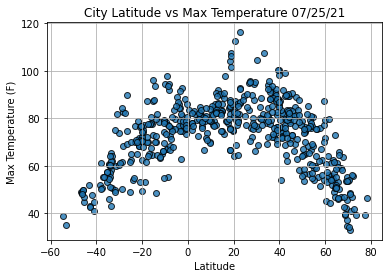

In [35]:
# Import the time module.
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()



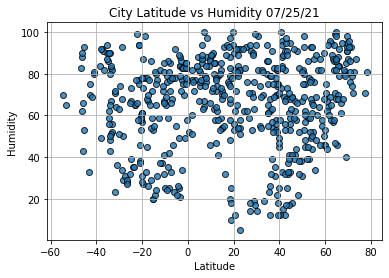

In [39]:
# Import the time module.
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

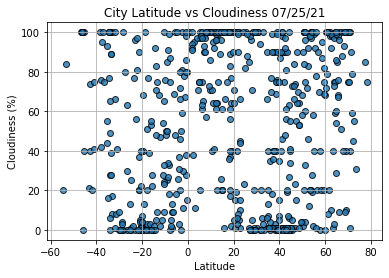

In [37]:
# Import the time module.
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

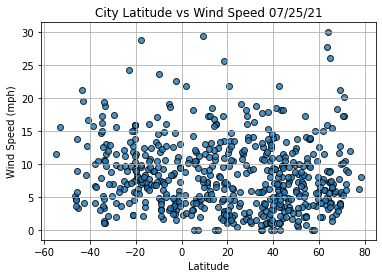

In [38]:
# Import the time module.
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()